In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(20800, 5)

In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [9]:
df.shape

(18285, 5)

In [10]:
df.duplicated().sum()

0

In [38]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [12]:
## Get the Independent Features

x=df.drop('label',axis=1)

In [13]:
## Get the Dependent features
y=df['label']

In [14]:
x

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [15]:
x.iloc[0,:]

id                                                        0
title     House Dem Aide: We Didn’t Even See Comey’s Let...
author                                        Darrell Lucus
text      House Dem Aide: We Didn’t Even See Comey’s Let...
Name: 0, dtype: object

In [16]:
x.shape

(18285, 4)

### Onehot Representation

In [24]:
##Vocalbulary_size
vocalb_size=5000


In [25]:
messages = x.copy(deep=True)

In [26]:
messages.reset_index(inplace=True)

In [27]:
messsaage= messages["title"]

In [22]:
import re

In [32]:
### Dataset Preprocessing
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages["title"][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [39]:
one_hot_repro = [one_hot(words, vocalb_size) for words in corpus]

In [52]:
sent_length=20
embedded_docs=pad_sequences(one_hot_repro,padding='post',maxlen=sent_length)
print(len(embedded_docs)*40*20)

14628000


In [43]:
model=Sequential()

In [48]:
model.add(Embedding(input_dim=vocalb_size, output_dim=, input_shape=(sent_length,))

SyntaxError: expected argument value expression (1196860071.py, line 1)

In [50]:
## Creating model
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(input_dim=vocalb_size, output_dim=embedding_vector_features, input_shape=(sent_length,)))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

C:\Users\JUBOB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 20, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

None


In [53]:
len(embedded_docs),y.shape

(18285, (18285,))

In [56]:
type(embedded_docs)

numpy.ndarray

In [57]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [58]:
type(X_final)

numpy.ndarray

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [70]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7719 - loss: 0.4074 - val_accuracy: 0.9203 - val_loss: 0.1929
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9585 - loss: 0.1262 - val_accuracy: 0.9193 - val_loss: 0.2085
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9723 - loss: 0.0870 - val_accuracy: 0.9178 - val_loss: 0.2426
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9815 - loss: 0.0657 - val_accuracy: 0.8989 - val_loss: 0.2923
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9810 - loss: 0.0623 - val_accuracy: 0.9180 - val_loss: 0.2663
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9881 - loss: 0.0418 - val_accuracy: 0.9165 - val_loss: 0.2688
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9900 - loss: 0.0397 - val_accuracy: 0.9125 - val_loss: 0.3545
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accu

C:\Users\JUBOB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [77]:
y_pred=model.predict(X_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [78]:
y_pred

array([[9.9661797e-01],
       [7.2660600e-04],
       [1.2578166e-02],
       ...,
       [8.4787840e-05],
       [9.9781525e-01],
       [1.3500763e-03]], dtype=float32)

In [72]:
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9055509527754764

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3419
           1       0.90      0.88      0.89      2616

    accuracy                           0.91      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.91      0.91      0.91      6035



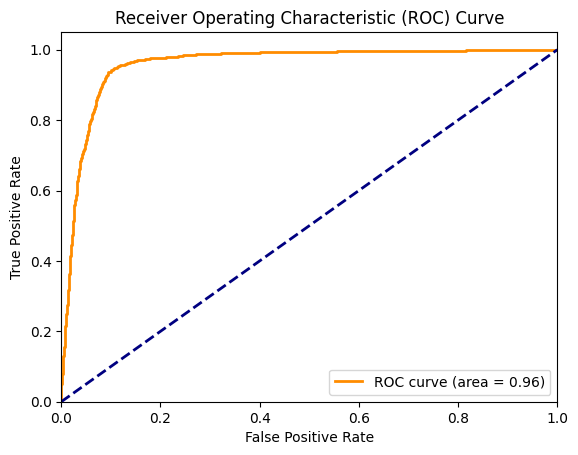

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted probabilities and y_true contains the true labels
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Use raw probabilities here
roc_auc = auc(fpr, tpr)
# Plotting the AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
